- Fungsi Jendela
Untuk sinyal analog, atau untuk sinyal diskrit tak terbatas waktu dalam bentuk sinusoidal, spektrumnya adalah fungsi delta pada frekuensi sinyal tersebut. Dalam praktiknya, spektrum sinyal harmonik terbatas waktu nyata setara dengan fungsi : 
(sin⁡(x))/x=sinc(x)
dan lebar lobus utama tergantung pada durasi interval analisis sinyal T. Pembatasan waktu tidak lain adalah perkalian sinyal dengan amplop persegi panjang.
    Kita telah mempelajari bahwa perkalian sinyal dalam domain waktu adalah konvolusi dari spektrumnya dalam domain frekuensi (dan sebaliknya: konvolusi sinyal dalam domain waktu adalah hasil kali spektrumnya). Dalam hubungan ini, spektrum sinyal harmonik terbatas selubung persegi panjang setara dengan sinc(x). Hal ini juga disebabkan oleh fakta bahwa kita tidak dapat mengintegrasikan sinyal pada interval waktu yang tidak terbatas, dan transformasi Fourier dalam bentuk diskrit-diekspresikan melalui jumlah yang terbatas-terbatas dalam jumlah sampel.
    Biasanya, panjang FFT dalam perangkat pemrosesan digital modern mengambil nilai NFFT dari 8 hingga beberapa juta poin. Dengan membatasi sinyal pada interval N dengan demikian, kami menerapkan jendela persegi panjang dengan durasi N sampel. Akibatnya, spektrum yang dihasilkan adalah spektrum sinyal harmonik yang dikalikan dan selubung persegi panjang. Mari kita buat spektrum sinyal harmonik pendek dengan parameter berikut: panjang sinyal N = 256, panjang NFFT = 2048. Untuk kejelasan, grafik spektrum disajikan dalam skala logaritmik.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
import scipy.signal as sig

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM) 
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL) 
plt.rc('legend', fontsize=FONT_MEDIUM) 
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

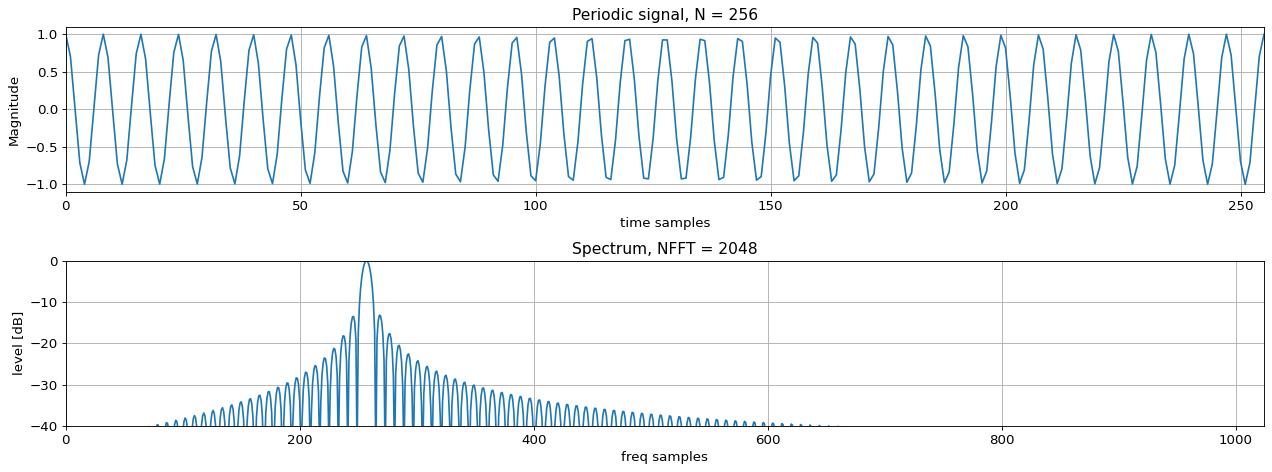

In [2]:
# Input parameters
N = 256
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(NFFT))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, NFFT//2])
plt.ylim([-40, 0])
plt.grid(True)
plt.tight_layout()

    Seperti yang dapat dilihat, spektrum sinyal harmonik pendek dalam kehidupan nyata tidak sama dengan fungsi delta, tetapi menyerupai konvolusi spektrum sinyal persegi panjang dan sinyal harmonik. Grafik menunjukkan paruh pertama domain frekuensi. Sinyal akhir adalah simetris sehubungan dengan setengah dari frekuensi sampling atau parameter NFFT/2.
    Perlu diingat bahwa spektrum sinyal persegi panjang setara dengan fungsi : sin(x)/(x)=sinc(x). Artinya, pada frekuensi sinyal pada fungsi delta seolah-olah "melapiskan spektrum jendela persegi panjang. Ketika durasi sinyal harmonik dalam domain waktu meningkat, spektrumnya cenderung ke fungsi delta pada frekuensi sinyal ini, dan pengaruh jendela persegi panjang berkurang.
    Kemudian pada batasan waktu sinyal mengarah ke pengenaan jendela persegi panjang. Pada contoh di bawah ini, durasi sinyal meningkat secara signifikan (N = 655536). Seperti yang dapat dilihat, spektrum sinyal seperti itu cenderung ke fungsi delta.

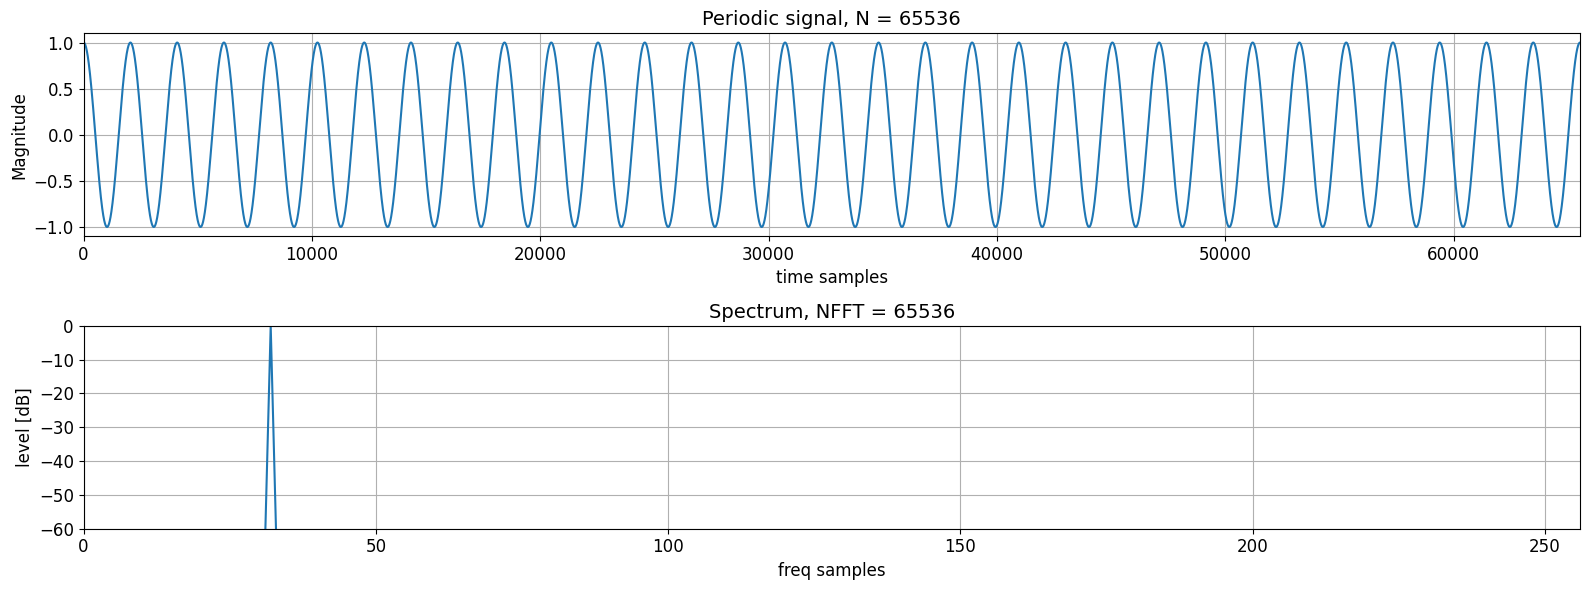

In [3]:
# Input parameters
N = 65536

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, N))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(N))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, N//256])
plt.ylim([-60, 0])
plt.grid(True)
plt.tight_layout()

    Namun, dalam kehidupan nyata dan dalam praktiknya, penggunaan sinyal tak terbatas tidak mungkin dilakukan dan memakan banyak tenaga:
- Sinyal yang sangat panjang membutuhkan memori yang besar untuk menyimpan nilai.
- Sinyal yang panjang mengandung lebih banyak energi daripada sinyal yang pendek, semua hal lain dianggap sama, yang pada gilirannya membuatnya lebih sulit untuk mengirim dan menerima sinyal tersebut.
- Sinyal panjang memerlukan lebih banyak sumber daya komputasi untuk pemrosesannya (konvolusi, pemfilteran, transformasi Fourier).
- Pulsa yang panjang akan mengalami lebih banyak distorsi daripada pulsa pendek karena waktu rambat yang lebih lama dalam media fisik.
    Ketika sinyal dikalikan dengan jendela persegi panjang (pemotongan rangkaian panjang menjadi sinyal nyata), maka terjadi apa yang disebut efek "spread spectrum" atau "blurring". Masalah utama dengan pemburaman spektrum yaitu, lobus samping sinyal yang lebih kuat dapat menyembunyikan sinyal yang lebih lemah. Di bawah ini akan ditunjukkan cara mengurangi efek penyebaran spektrum dengan bantuan fungsi jendela.

- Fungsi jendela
    Dalam tugas pemrosesan sinyal digital, jendela berbagai bentuk telah ditemukan, yang apabila ditumpangkan pada sinyal dalam domain waktu, memungkinkan untuk memperbaiki karakteristik spektralnya secara kualitatif. Banyaknya jenis jendela yang ada, terutama disebabkan oleh salah satu fitur utama dari setiap tumpang-tindih jendela. Fitur ini diekspresikan dalam hubungan antara tingkat lobus samping dan lebar lobus tengah.
Aturan praktis: semakin kuat penekanan lobus samping spektrum, semakin lebar lobus utama spektrum, dan sebaliknya
    Bayangkan sinyal yang dibagi menjadi beberapa urutan, yang masing-masing diproses secara independen, kemudian disatukan menjadi satu sinyal. Apabila menghitung FFT, jendela persegi panjang ditumpangkan. Akibatnya, rekonstruksi bentuk gelombang berikutnya akan menyebabkan efek yang tidak diinginkan, yang diekspresikan dalam distorsi bentuk gelombang pada persimpangan (lonjakan sinyal). Untuk memperhalus lonjakan ini, Anda dapat menerapkan pemfilteran jendela.
    Salah satu penerapan fungsi jendela: mendeteksi sinyal lemah di latar belakang sinyal yang lebih kuat dengan menekan level lobus samping. Fungsi jendela utama dalam tugas DSP adalah segitiga, sinusoidal, Lanzos, Hahn, Hamming, Blackman, Harris, Blackman-Harris, jendela datar, Natall, Gauss, Kaiser, dan banyak lagi. Sebagian besar diekspresikan melalui deret hingga dengan menjumlahkan sinyal harmonik dengan koefisien bobot tertentu. Sinyal seperti itu direalisasikan dengan sempurna dalam praktiknya pada perangkat keras apa pun (sirkuit logika yang dapat diprogram atau prosesor sinyal).
    Jendela dengan bentuk yang kompleks dihitung dengan mengambil eksponen (jendela Gaussian) atau fungsi Bessel yang dimodifikasi (jendela Kaiser). Fungsi jendela seperti itu lebih sulit untuk direalisasikan dalam sirkuit terpadu (perhitungan fungsi eksponen atau Bessel memerlukan tabel untuk mengkodekan satu nilai ke nilai lainnya).

Faktor penekanan
Jelas, ketika mengalikan sinyal dengan fungsi jendela, ada perubahan dalam amplitudo osilasi yang dihasilkan. Dalam tugas DSP, konsep koefisien atenuasi diperkenalkan, yang mencirikan penekanan sinyal dalam proses pemfilteran jendela dibandingkan dengan jendela persegi panjang. Rumus untuk menghitung koefisien atenuasi:

 β = Aw/Ar . 1/(N )∑_(n=0)^(N-1)w(n)

dimana : 
Aw : tingkat komponen konstan dari fungsi jendela
Ar : tingkat komponen konstan dari jendela persegi panjang
w(n) : jumlah fungsi jendela
N : panjang fungsi jendela.

Dengan menggunakan python, mari kita tentukan terlebih dahulu fungsi yang memetakan fungsi jendela:

In [7]:
def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)
    
    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Window fucntion')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

- Fungsi jendela dasar
Berikut ini adalah ekspresi untuk fungsi jendela dasar. Durasi fungsi jendela adalah. N, w(n) hitungan dari fungsi window. Dalam pustaka Python scipy, semua jendela yang umum dikenal tersedia dalam paket sinyal. Memanggil mereka cukup sederhana. Berikut ini, efisiensi komparatif dari berbagai window akan ditampilkan dalam bentuk tabel dan grafik.Dengan aturan: jumlah modulus dari koefisien fungsi jendela sama dengan satu!

- Jendela persegi panjang
w(n)=1
Jendela paling sederhana, memiliki karakteristik terburuk dan diperoleh secara otomatis dengan memotong urutan ke N
sampel. Level lobus samping maksimum (SLL) dari respons frekuensi jendela persegi panjang: -13 dB.
Python: signal.boxcar(M)

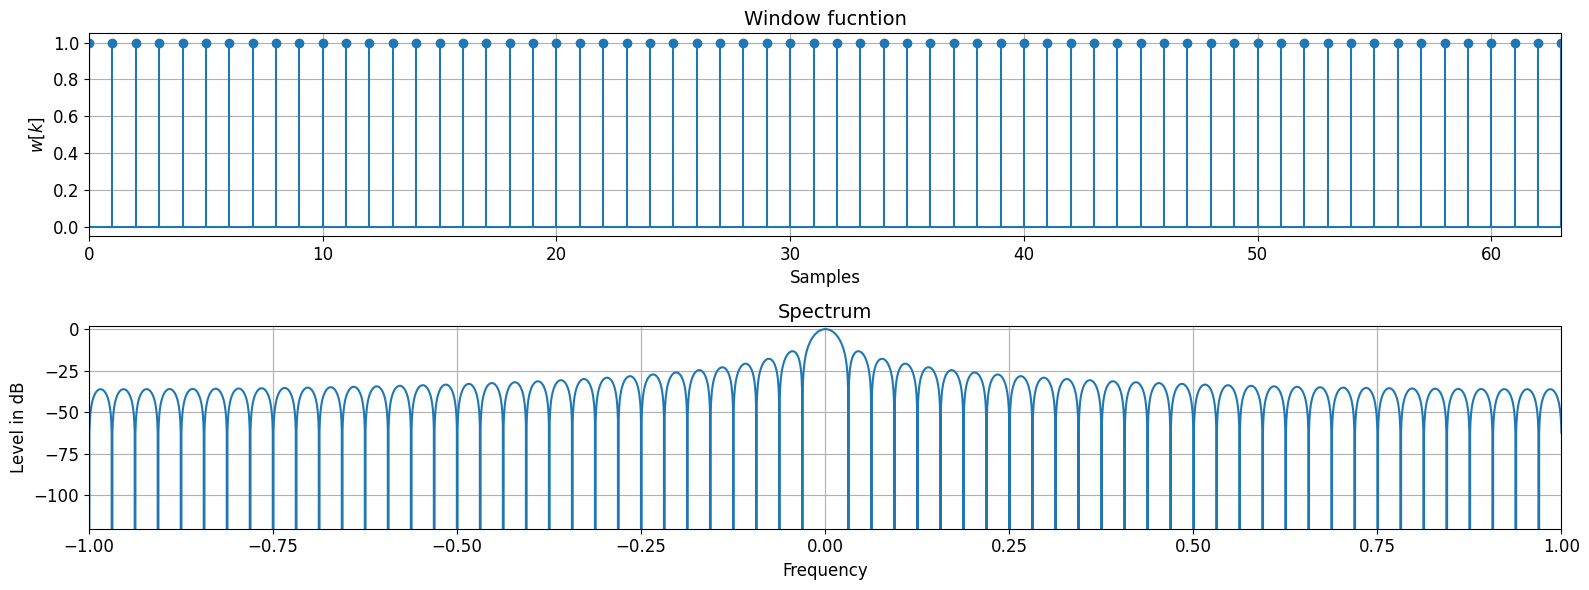

In [6]:
N = 64
dft_win(np.ones(N))

- Jendela segitiga
Juga dikenal sebagai jendela Bartlett.
    w(n) = 1 - n - N/2 / L/2
Di mana L = N,N + 1,N + 2
Tingkat lobus samping maksimum: -26 dB.
Python: signal.triang(M) atau bartlett(M)

<ipython-input-12-3422908e8bb7>:2: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.triang(N))


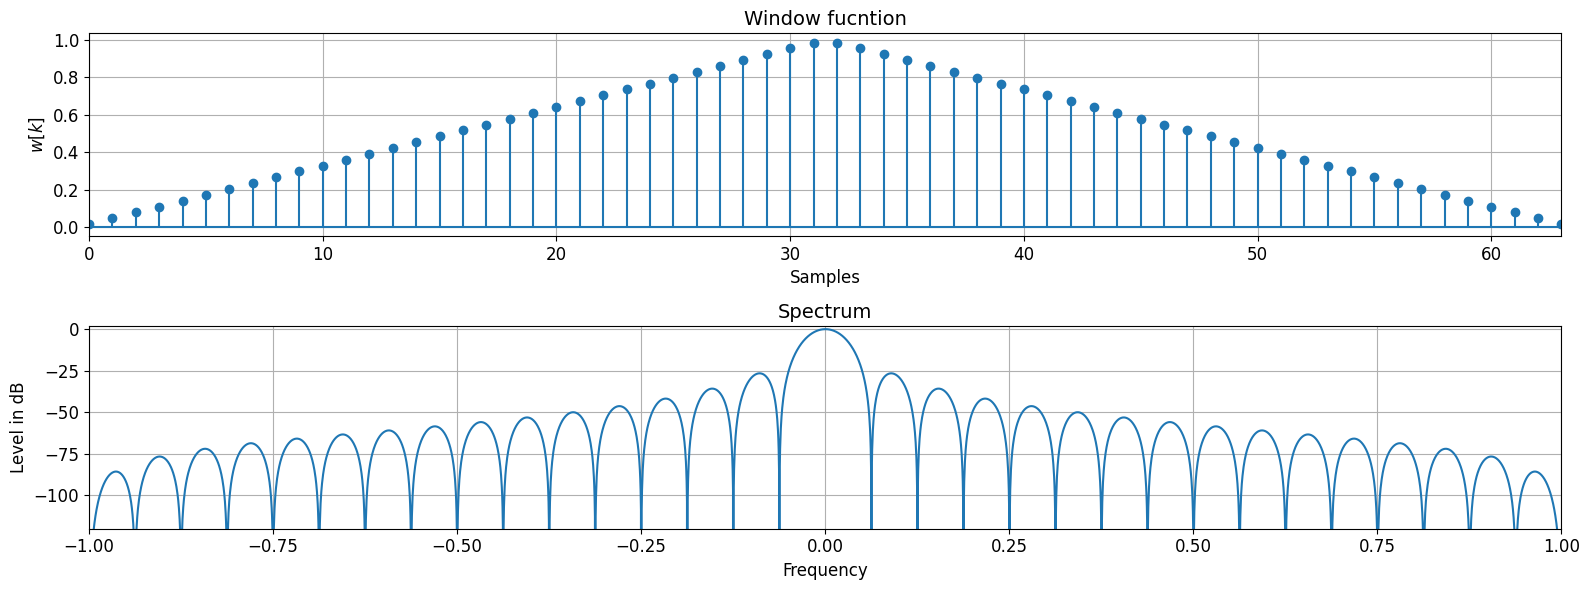

In [12]:
N = 64
dft_win(sig.triang(N))

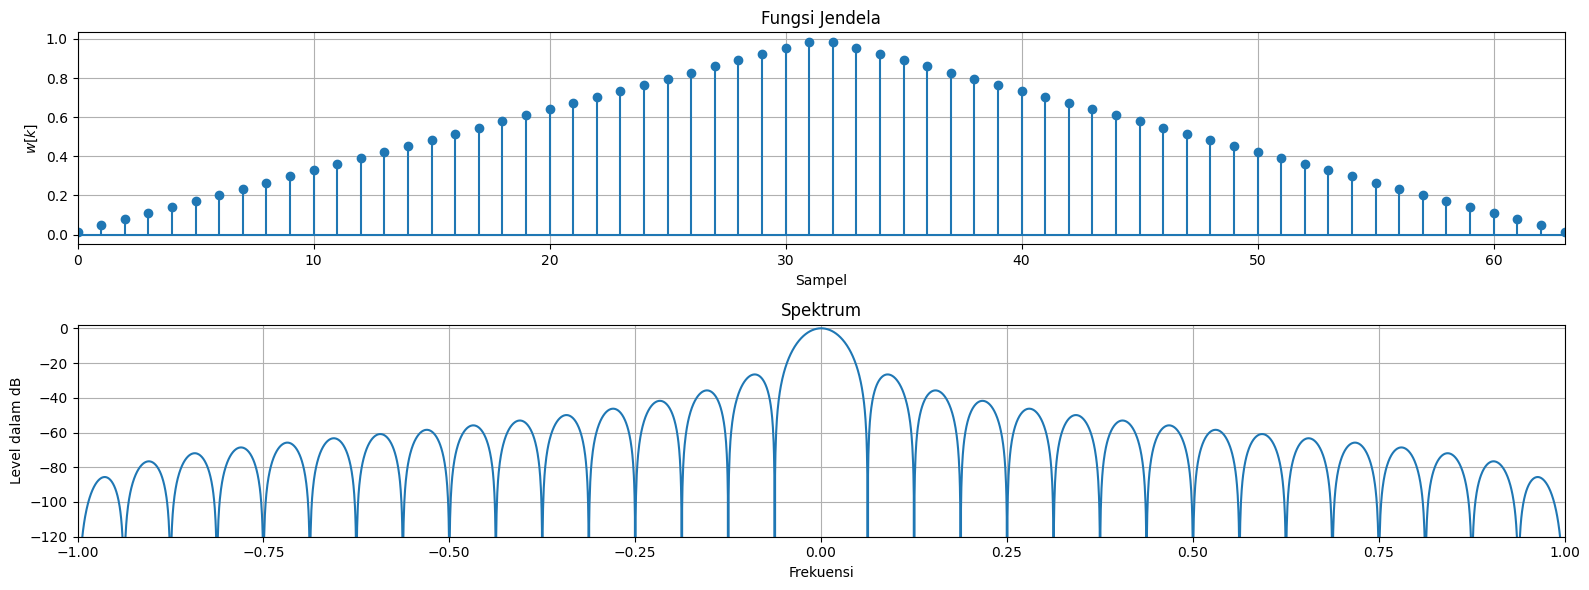

In [12]:
# Solusi kode diatas :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal dari scipy

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0, 1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(tt, 20 * np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Menghasilkan jendela triangular dengan panjang N = 64
N = 64
w = signal.windows.triang(N)  # Menggunakan signal.windows.triang

# Memanggil fungsi dft_win dengan jendela triangular sebagai argumen
dft_win(w)

- Sinus
 w(n) = sin (π.n / N - 1)
Jendela yang sederhana dalam hal implementasi perangkat lunak dan perangkat keras. Tingkat lobus sisi jendela sinus maksimum: -23 dB.
Python: signal.cosinus(M)

<ipython-input-9-a414f4eafc15>:2: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.cosine(N))


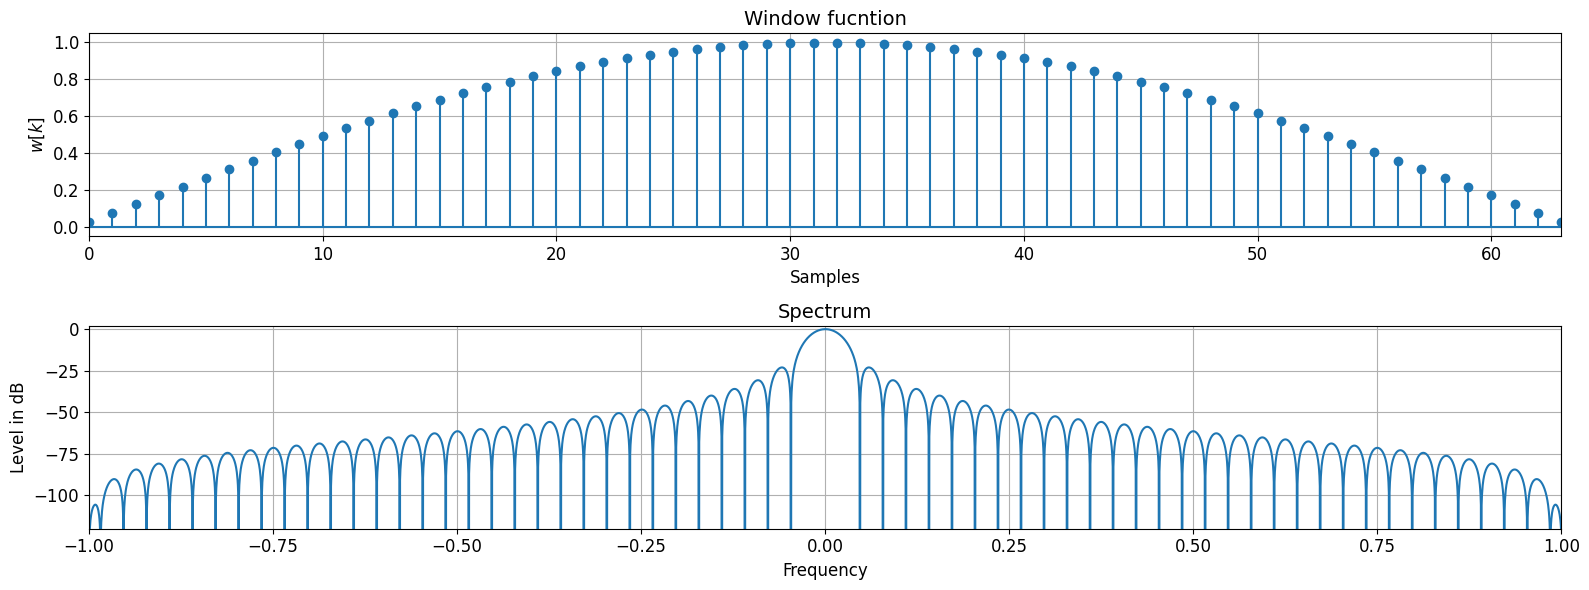

In [9]:
N = 64
dft_win(sig.cosine(N))

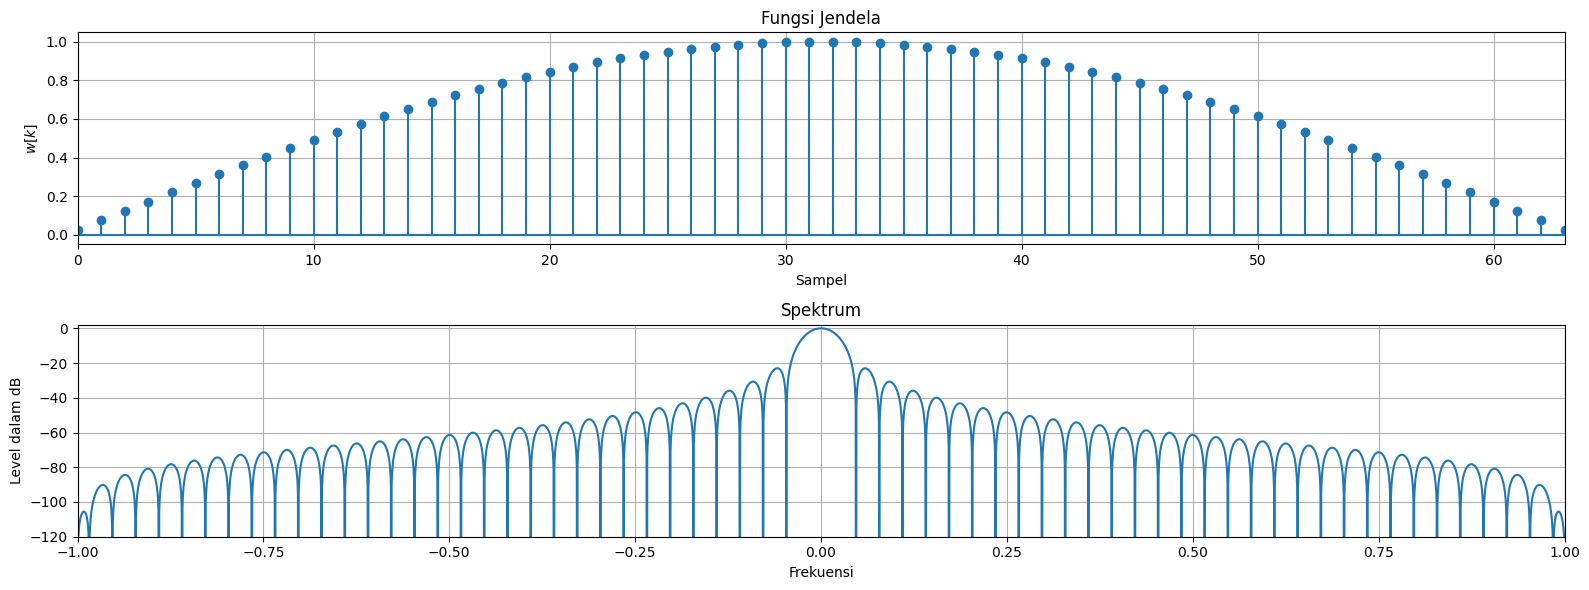

In [13]:
# Solusi kode diatas :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal dari scipy

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0, 1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(tt, 20 * np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Menghasilkan jendela cosine dengan panjang N = 64
N = 64
w = signal.windows.cosine(N)  # Menggunakan signal.windows.cosine

# Memanggil fungsi dft_win dengan jendela cosine sebagai argumen
dft_win(w)


- Jendela Hahn
 w(n) = 0.5 [1-cos(2π n/N-1)]
Jendela ini juga disebut sebagai jendela Blackman-Harris orde kedua. Tingkat lobus samping maksimum dari jendela sinus: -31,5 dB.
Python: signal.hann(M) dan signal.hanning(M)

In [16]:
# Solusi error berikut dibawah kode ini 
N = 64
dft_win(sig.hann(N))

<class 'NameError'>: name 'sig' is not defined

<ipython-input-14-c448e39b7730>:48: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  w = signal.hann(N)


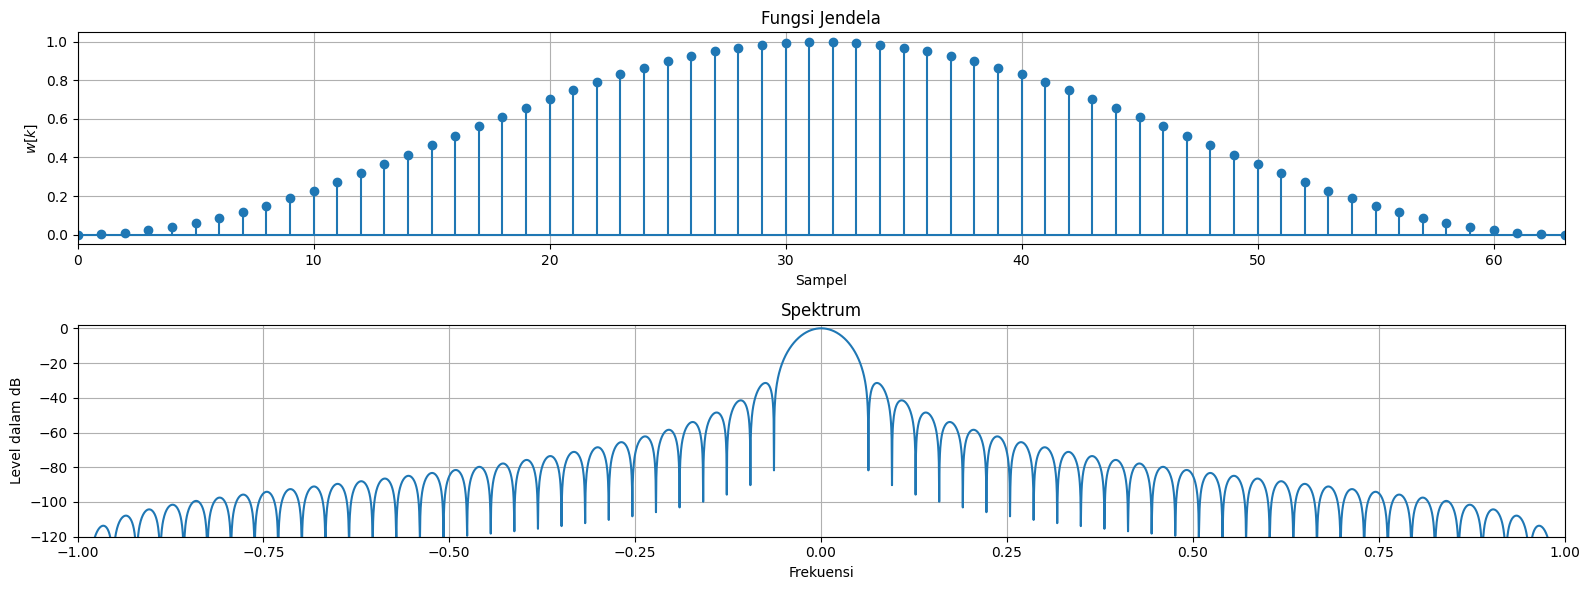

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Impor modul signal

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        vektor jendela input
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Sekarang dapat gunakan signal.hann(N) untuk menghasilkan jendela Hann
N = 64
w = signal.hann(N)
dft_win(w)  # Panggil fungsi dft_win dengan jendela Hann sebagai argumennya


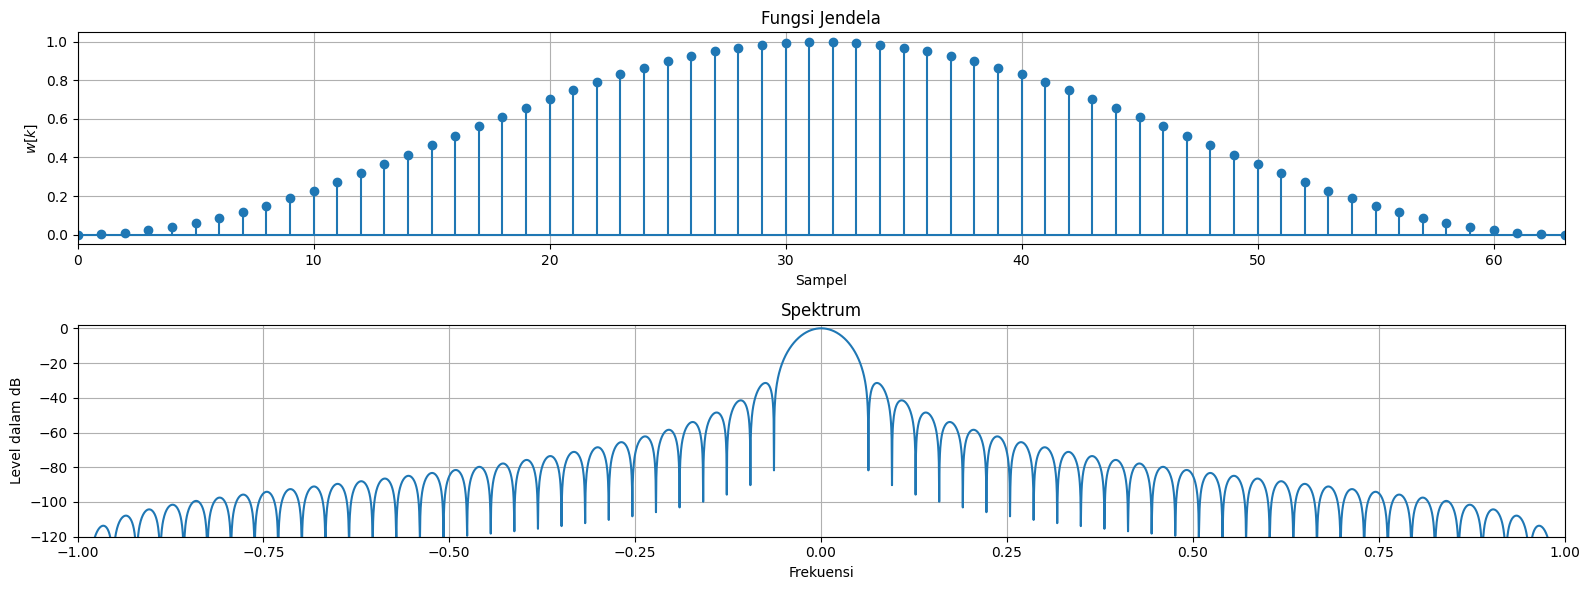

In [14]:
# Solusi kode diatas :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal dari scipy

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0, 1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(tt, 20 * np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Menghasilkan jendela hann dengan panjang N = 64
N = 64
w = signal.windows.hann(N)  # Menggunakan signal.windows.hann

# Memanggil fungsi dft_win dengan jendela cosine sebagai argumen
dft_win(w)

- Jendela hemming
 w(n) = 0.53836 - 0.46164.cos (2π n/N-1)
Tingkat lobus samping maksimum: -42 dB.
Python: signal.hamming(M)

<ipython-input-13-ff0937091f0d>:2: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.hamming(N))


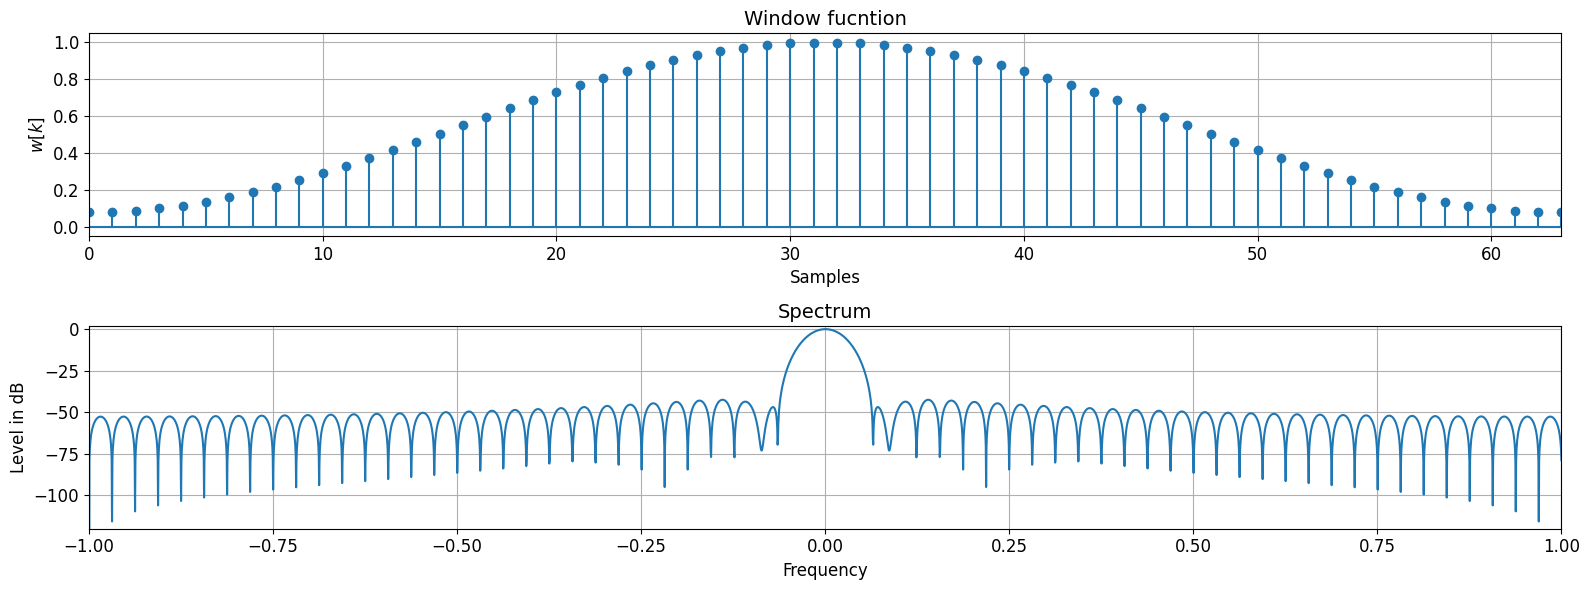

In [13]:
N = 64
dft_win(sig.hamming(N))

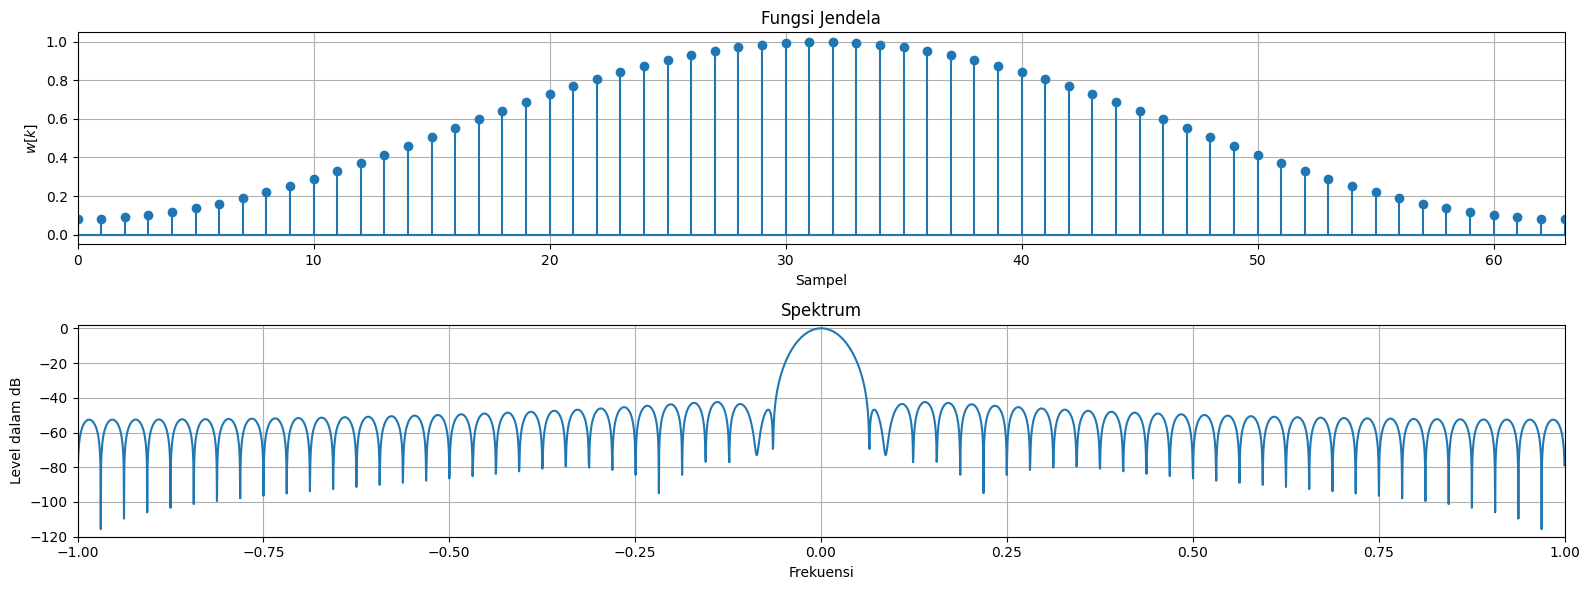

In [16]:
# Solusi kode diatas :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal dari scipy

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0, 1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(tt, 20 * np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Menghasilkan jendela hamming dengan panjang N = 64
N = 64
w = signal.windows.hamming(N)  # Menggunakan signal.windows.hamming

# Memanggil fungsi dft_win dengan jendela cosine sebagai argumen
dft_win(w)

- Jendela Blackman
 w(n) = a0 - a1.cos (2π n / N-1) + a2.cos (4π n /N-1)
dimana a0 = 1-a/2; a1 = 0.5; a2 = 0.5.α
 
Pada α = 0,16 dengan tingkat lobus samping maksimum: -58 dB.
Python: signal.blackman(M)

<ipython-input-14-dada6642a747>:2: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.blackman(N))


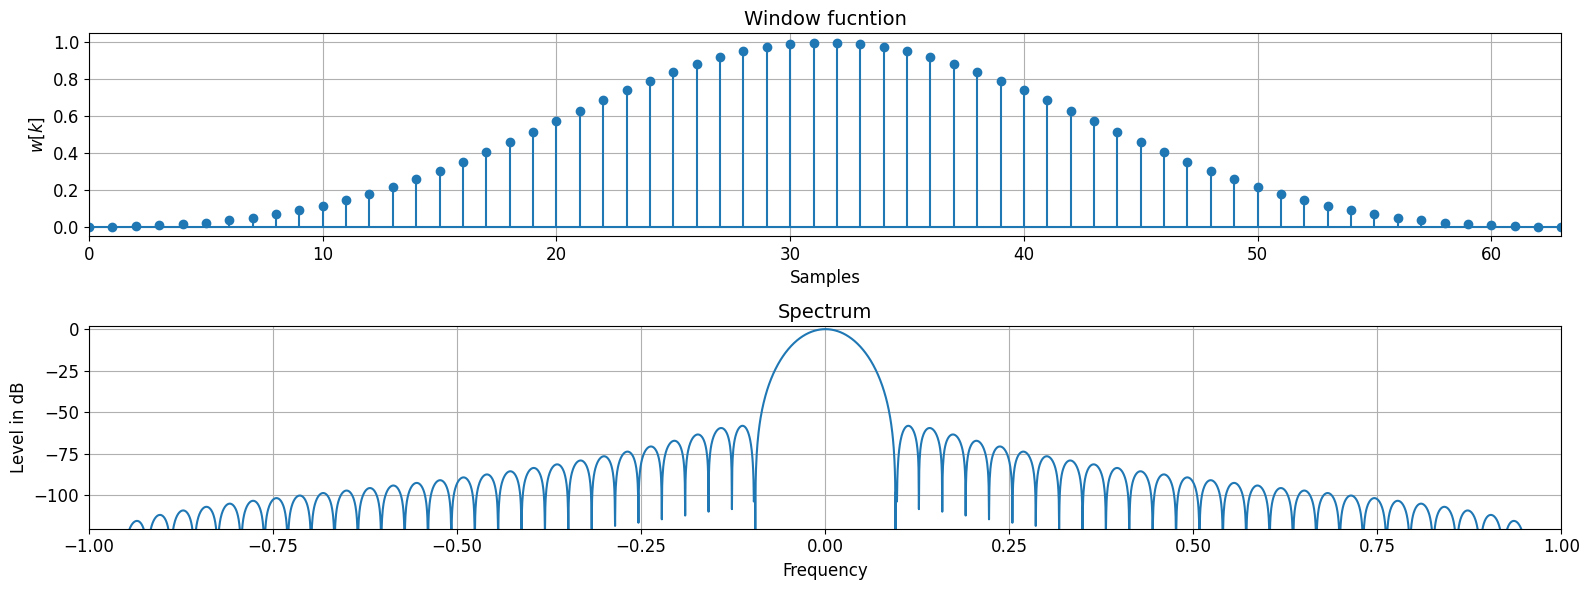

In [14]:
N = 64
dft_win(sig.blackman(N))

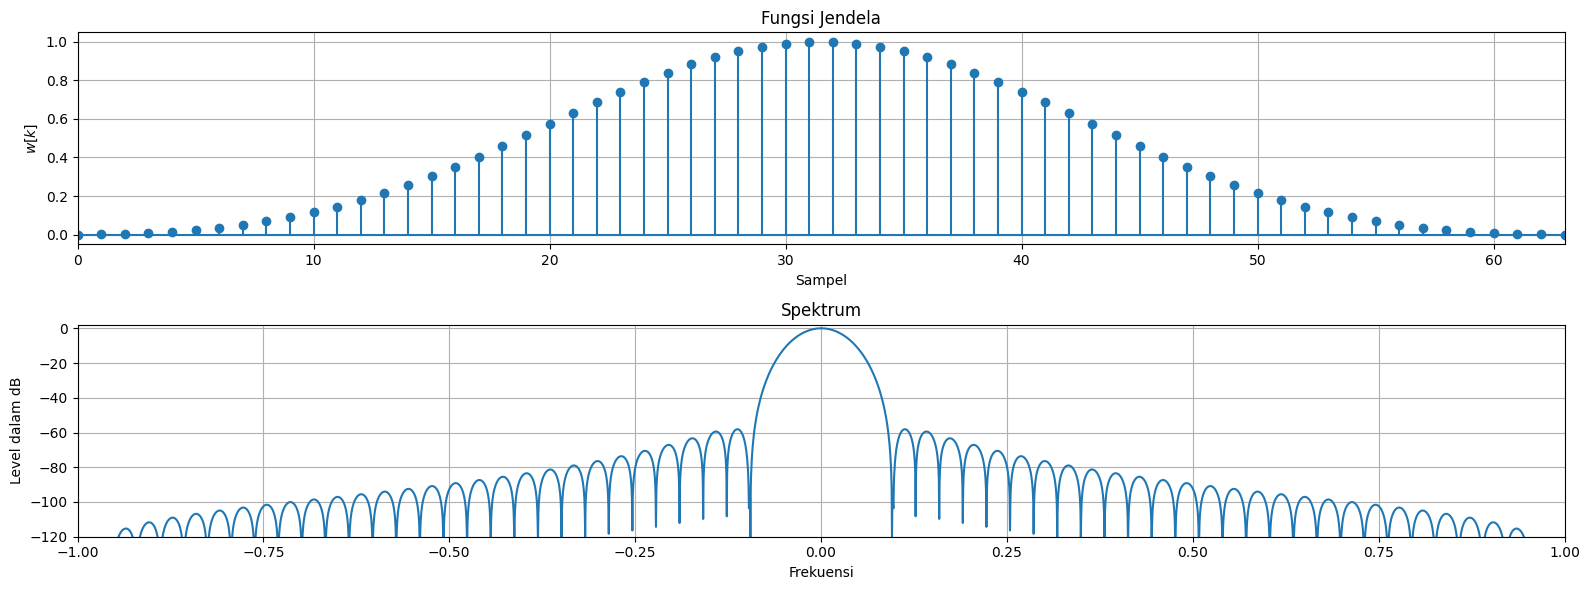

In [17]:
# Solusi kode diatas :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal dari scipy

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0, 1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(tt, 20 * np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Menghasilkan jendela blackman dengan panjang N = 64
N = 64
w = signal.windows.blackman(N)  # Menggunakan signal.windows.blackman

# Memanggil fungsi dft_win dengan jendela cosine sebagai argumen
dft_win(w)

- Jendela Blackman-Harris
Didefinisikan dengan jumlah empat penjumlahan (yaitu, jendela orde empat).
 w(n) = a0 - a1.cos (2π n / N-1) + a2.cos (4π n /N-1) - a3.cos (6π n / N-1)

di mana a0 = 0.385875, a1 = 0.48829, a2 = 0.14128, a3 = 0.01168
Tingkat lobus samping maksimum: -92 dB.
Python: signal.blackmanharris(M)

In [17]:
# Solusi error kode berikut dibawah ini :
N = 64
dft_win(sig.blackmanharris(N))

<class 'NameError'>: name 'sig' is not defined

<ipython-input-18-3a202e2217e3>:48: DeprecationWarning: Importing blackmanharris from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackmanharris' or the convenience function 'scipy.signal.get_window' instead.
  w = signal.blackmanharris(N)


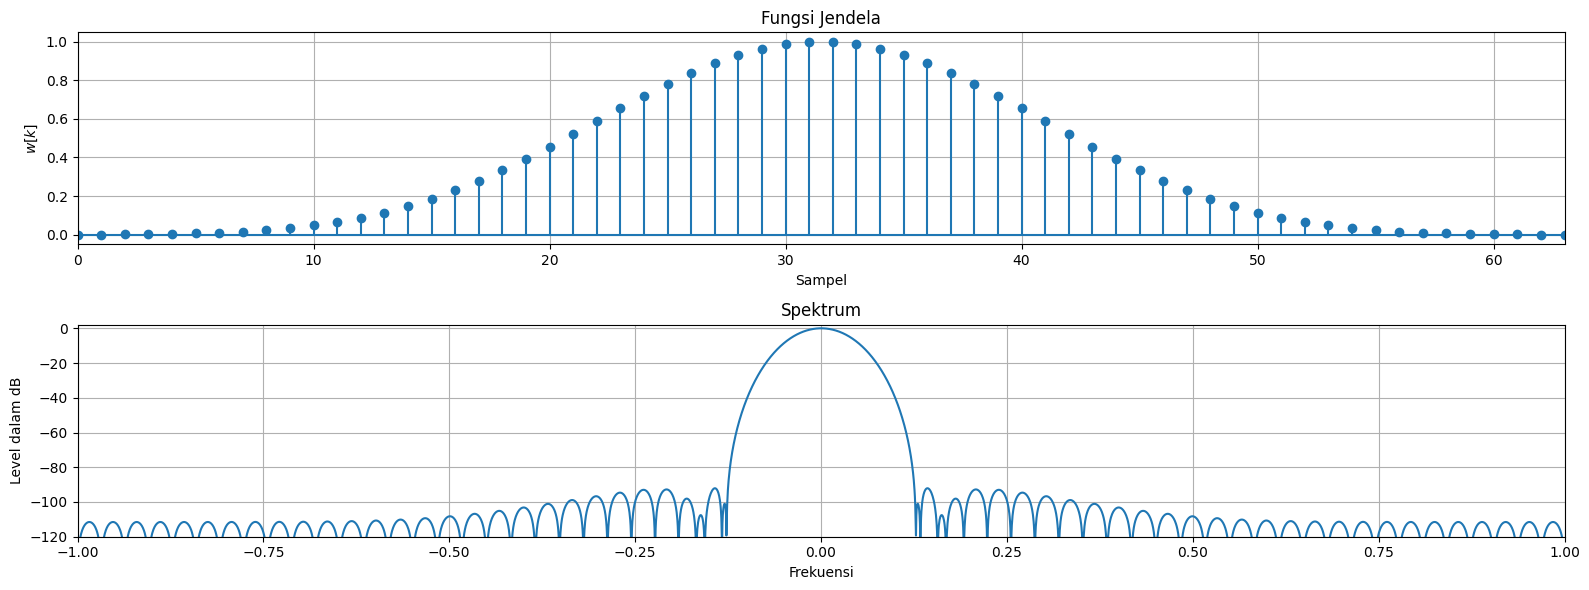

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Impor modul signal

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        vektor jendela input
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Sekarang dapat gunakan signal.blackmanharris(N) untuk menghasilkan jendela blackmanharris
N = 64
w = signal.blackmanharris(N)
dft_win(w)  # Panggil fungsi dft_win dengan jendela blackmanharris sebagai argumennya

In [ ]:
# Solusi kode diatas :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal dari scipy

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0, 1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(tt, 20 * np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Menghasilkan jendela blackmanharris dengan panjang N = 64
N = 64
w = signal.windows.blackmanharris(N)  # Menggunakan signal.windows.blackmanharris

# Memanggil fungsi dft_win dengan jendela cosine sebagai argumen
dft_win(w)

- Jendela Blackman-Nuttall
Rumusnya mirip dengan jendela Blackman-Harris. Satu-satunya perbedaan adalah pada koefisiennya. Ini diberikan oleh jumlah dari empat penjumlahan.
w(n) = a0 - a1.cos (2π n / N-1) + a2.cos (4π n /N-1) - a3.cos (6π n / N-1)
Di mana a0 = 0.3635819, a1 = 0.4891775, a2 = 0.1365995, a3 = 0.0106411
Tingkat lobus samping maksimum: -93 dB.
Python: signal.nuttall(M)

In [19]:
N = 64
dft_win(sig.nuttall(N))

<class 'NameError'>: name 'sig' is not defined

<ipython-input-23-a68fd47560e9>:48: DeprecationWarning: Importing nuttall from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.nuttall' or the convenience function 'scipy.signal.get_window' instead.
  w = signal.nuttall(N)


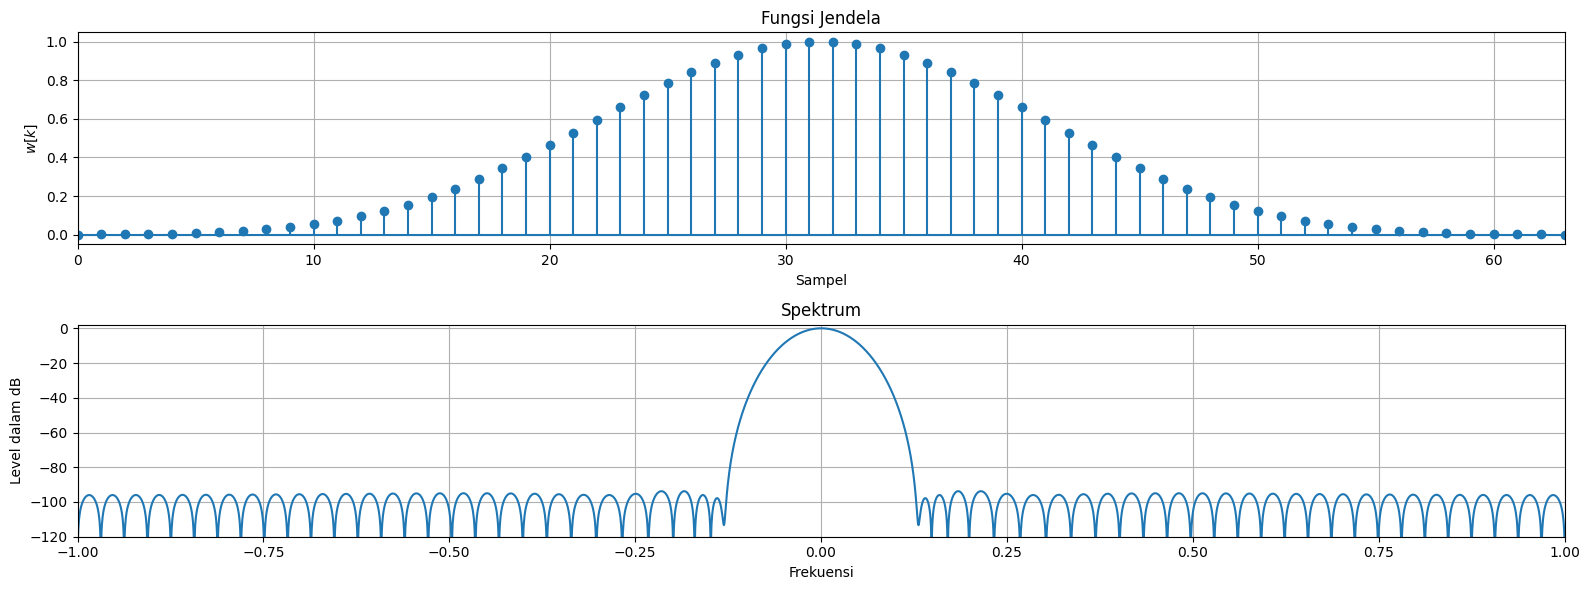

In [23]:
# Solusi error kode berikut dibawah ini :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Impor modul signal

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        vektor jendela input
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Sekarang dapat gunakan signal.nuttall(N) untuk menghasilkan jendela nuttal
N = 64
w = signal.nuttall(N)
dft_win(w)  # Panggil fungsi dft_win dengan jendela nuttall sebagai argumennya

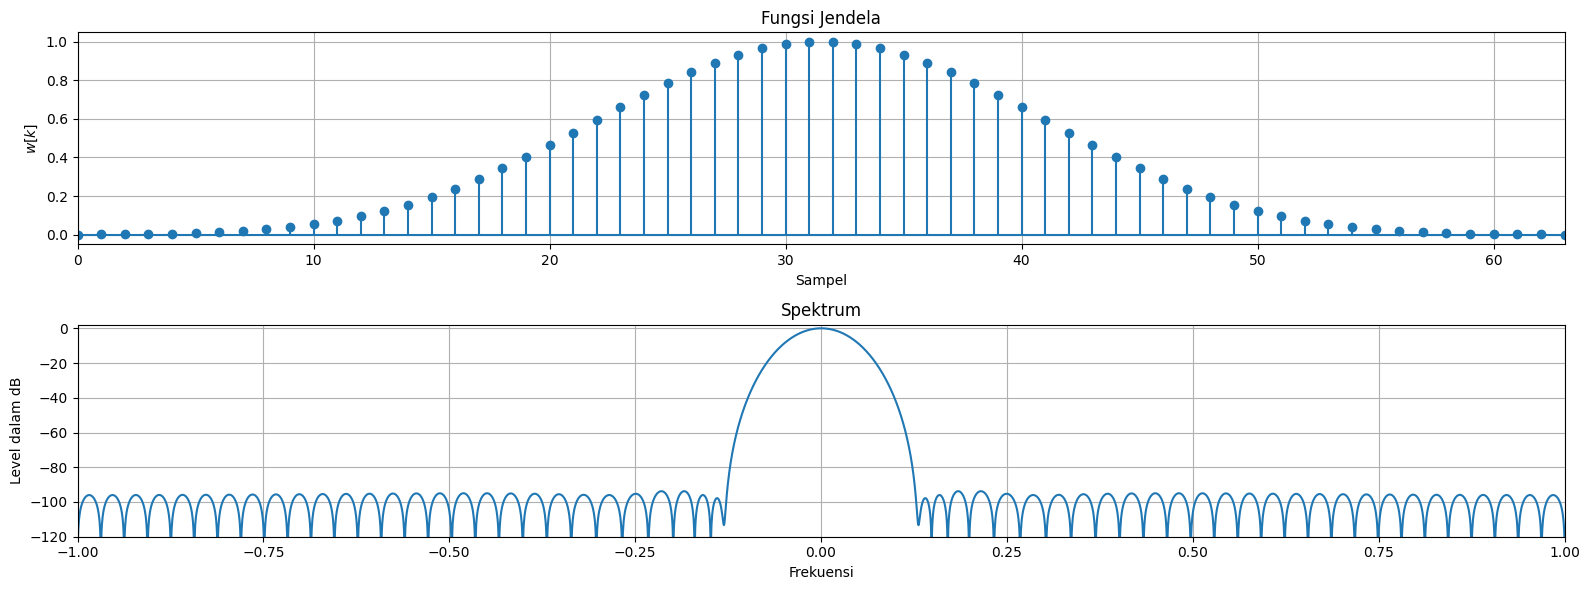

In [18]:
# Solusi kode diatas :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal dari scipy

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0, 1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(tt, 20 * np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Menghasilkan jendela nuttall dengan panjang N = 64
N = 64
w = signal.windows.nuttall(N)  # Menggunakan signal.windows.nuttall

# Memanggil fungsi dft_win dengan jendela cosine sebagai argumen
dft_win(w)

- Jendela atas datar (Flat-top window)
Jendela atas datar (Jendela atas datar).

    w(n) = a0 - a1.cos (2π n / N-1) + a2.cos (4π n /N-1) - a3.cos (6π n / N-1) + a4.cos (8π n / N-1)

di mana
a0 = 0.21556895
a2 = 0.41663158
a3 = 0.277263158
a4 = 0.0.0069474
Tingkat lobus samping maksimum: -70 dB.
Python: signal.flattop(M)

In [25]:
N = 64
dft_win(sig.flattop(N))

<class 'NameError'>: name 'sig' is not defined

<ipython-input-24-edb815fe5275>:49: DeprecationWarning: Importing flattop from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.flattop' or the convenience function 'scipy.signal.get_window' instead.
  w = signal.flattop(N)


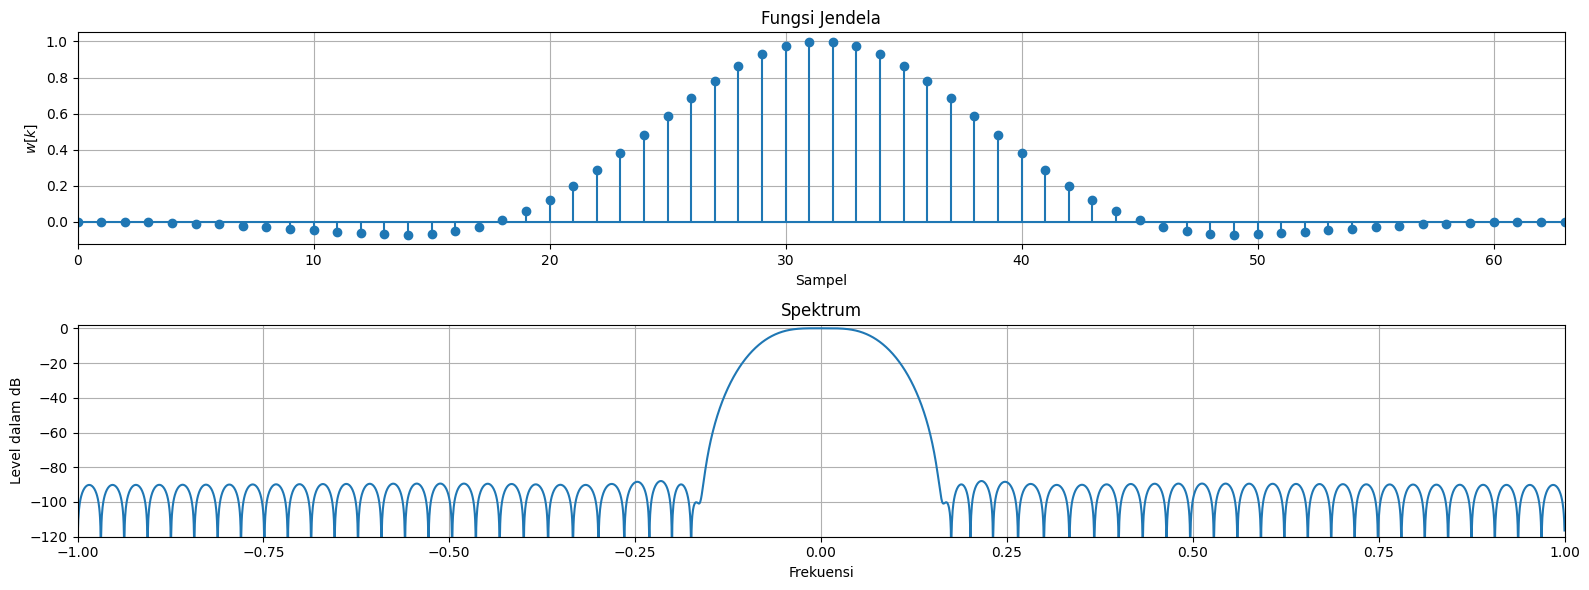

In [24]:
# Solusi error kode berikut dibawah ini :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Impor modul signal

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        vektor jendela input
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Sekarang dapat gunakan signal.flattop(N) untuk menghasilkan jendela flattop
N = 64
w = signal.flattop(N)
dft_win(w)  # Panggil fungsi dft_win dengan jendela Flat-top sebagai argumennya

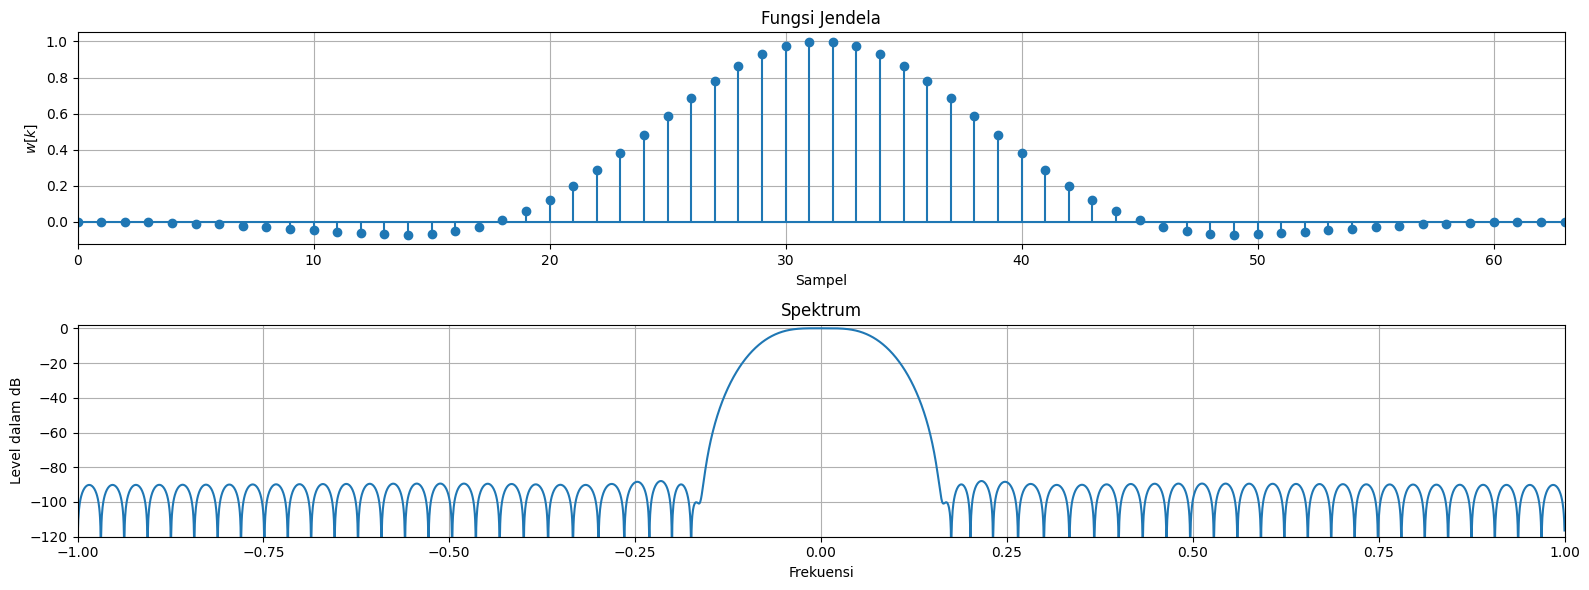

In [19]:
# Solusi kode diatas :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal dari scipy

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0, 1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(tt, 20 * np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Menghasilkan jendela flattop dengan panjang N = 64
N = 64
w = signal.windows.flattop(N)  # Menggunakan signal.windows.flattop

# Memanggil fungsi dft_win dengan jendela cosine sebagai argumen
dft_win(w)

- Jendela Kaiser
Jendela Kaiser. Bervariasi dengan parameter 
yang menentukan tingkat atenuasi dan kecuraman penurunan respons frekuensi. Jendela Kaiser adalah sejenis jendela universal dengan bantuan satu atau beberapa parameter pemfilteran yang dapat dipilih untuk kelas tugas yang luas.

    w(n) = |I0 √1 - (2n-N+1/N-1)^2| / |I0(β)
dimana:
I0 : fungsi Bessel yang dimodifikasi dari jenis orde nol yang pertama.
β : koefisien yang menentukan bagian energi yang terkonsentrasi di lobus utama spektrum fungsi jendela.
Semakin besar adalah semakin besar fraksi energi di dalam lobus utama, dan semakin lebar lobus utama. Akibatnya, semakin kecil adalah tingkat lobus samping (penekanan yang lebih baik dalam tugas penyaringan). Dalam praktiknya, fungsi Kaiser tidak secara praktis diimplementasikan dalam perangkat keras, tetapi diterapkan dalam perangkat lunak (perhitungan koefisien filter FIR). Dalam tugas-tugas nyata, nilainya dari 5 hingga 11.
Python: signal.kaiser(M, beta)

In [26]:
N = 64
dft_win(sig.kaiser(N, beta=4))

<class 'NameError'>: name 'sig' is not defined

<ipython-input-20-02a4c7430c37>:49: DeprecationWarning: Importing flattop from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.flattop' or the convenience function 'scipy.signal.get_window' instead.
  w = signal.flattop(N)


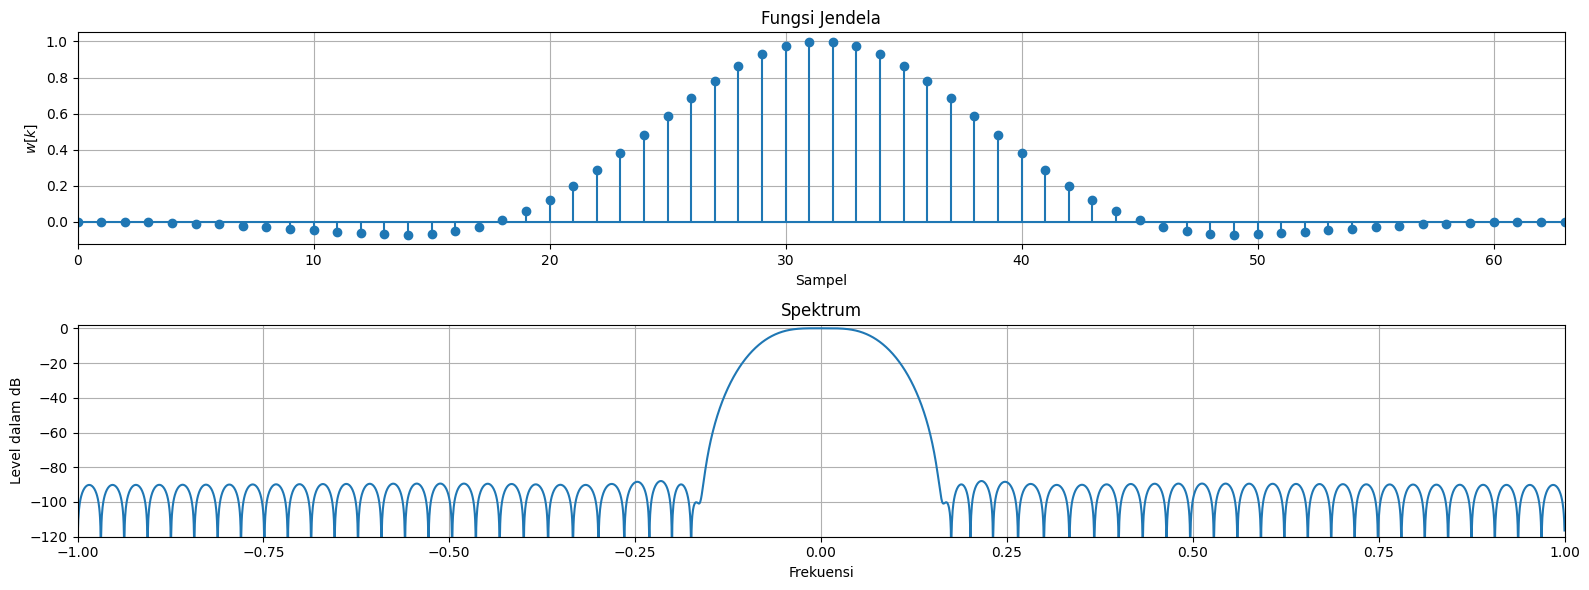

In [20]:
# Solusi error kode berikut dibawah ini :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Impor modul signal

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        vektor jendela input
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Sekarang dapat gunakan signal.kaiser(N) untuk menghasilkan jendela kaiser
N = 64
w = signal.flattop(N)
dft_win(w)  # Panggil fungsi dft_win dengan jendela kaiser sebagai argumennya

In [1]:
N = 64
dft_win(sig.kaiser(N, beta=10))

<class 'NameError'>: name 'dft_win' is not defined

<ipython-input-2-b22565e05d72>:49: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  w = signal.kaiser(N, beta=4)


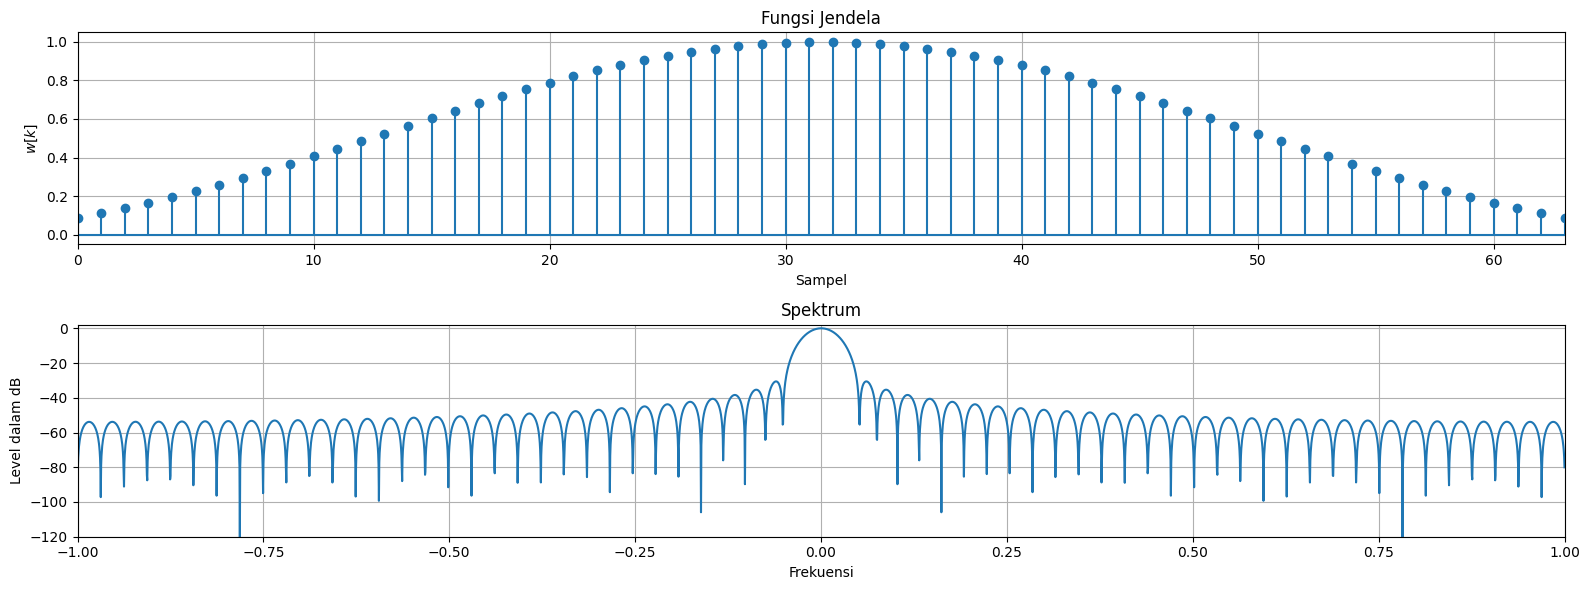

In [2]:
# Solusi error kode berikut dibawah ini :
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Sekarang dapat menggunakan signal.kaiser(N, beta=4) untuk menghasilkan jendela Kaiser
N = 64
w = signal.kaiser(N, beta=4)
dft_win(w)  # Panggil fungsi dft_win dengan jendela Kaiser sebagai argumennya


- Jendela Gaussian
Jendela Gaussian ditentukan oleh fungsi eksponensial dan bervariasi oleh parameter varians (deviasi standar).

    w(n) = e^1/2(n/σ)^2
 
Sifat frekuensi dari jendela bergantung pada parameter.
Semakin besar adalah semakin sempit lobus utama, tetapi semakin tinggi tingkat lobus samping (penekanan yang lebih buruk).
Dalam praktiknya, jendela Gauss tidak diimplementasikan secara praktis dalam perangkat keras, tetapi digunakan dalam perangkat lunak, misalnya, dalam tugas menghitung koefisien filter FIR.
Python: signal.gaussian(M, std)

In [3]:
N = 64
dft_win(sig.gaussian(N, std=16))

<class 'NameError'>: name 'sig' is not defined

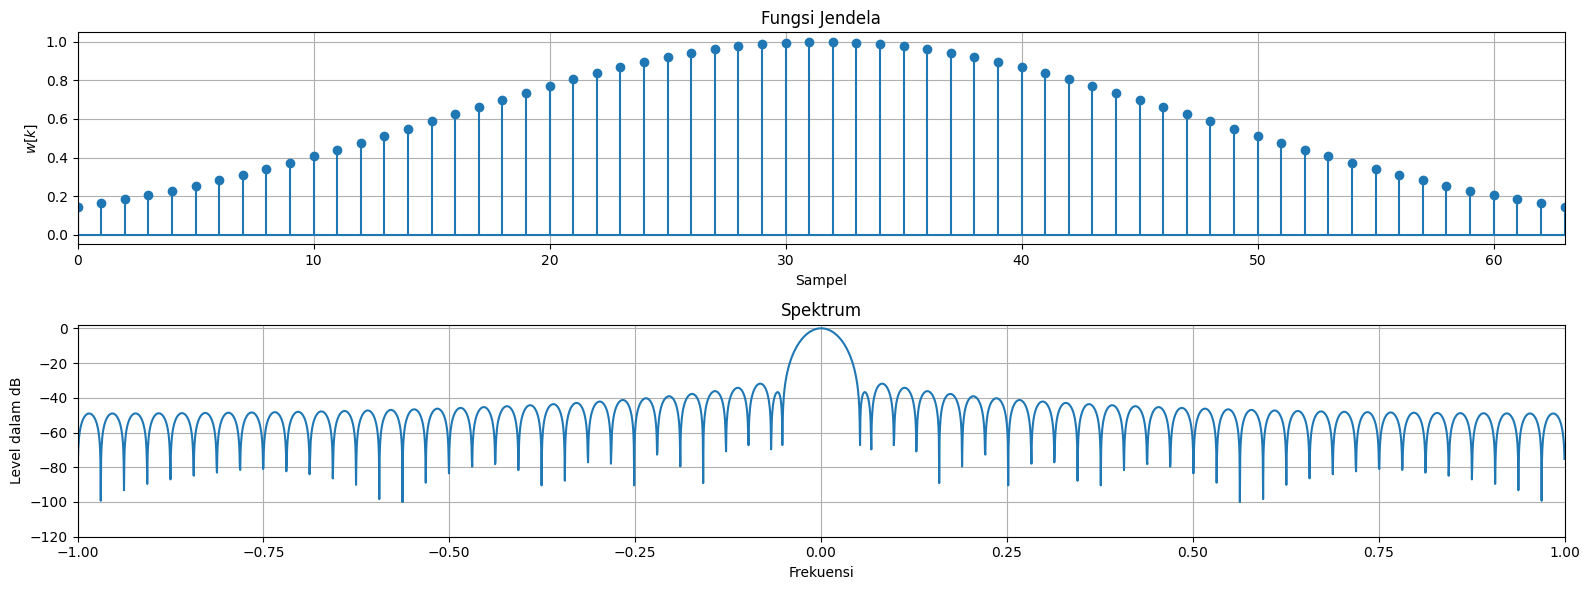

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal dari scipy

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0, 1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(tt, 20 * np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Menghasilkan jendela Gaussian dengan panjang N = 64 dan std = 16
N = 64
w = signal.windows.gaussian(N, std=16)  # Menggunakan signal.windows.gaussian

# Memanggil fungsi dft_win dengan jendela Gaussian sebagai argumen
dft_win(w)


In [5]:
N = 64
dft_win(sig.gaussian(N, std=8))

<class 'NameError'>: name 'sig' is not defined

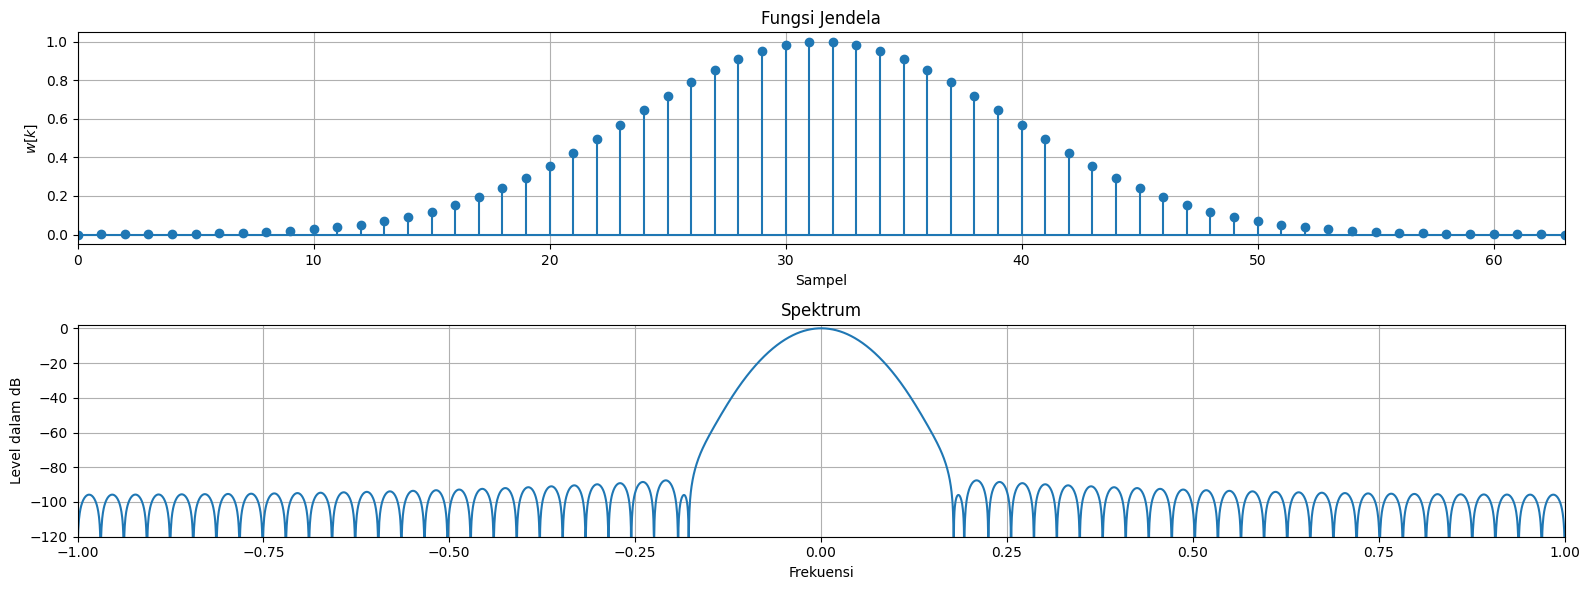

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal  # Import modul signal dari scipy

def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan maksimum dan tambahkan nilai floating-point minimum (kecuali bagi-nol)
    W = W / np.amax(W) + np.nextafter(0, 1)
    tt = np.linspace(-1, 1, NFFT)
    
    # Plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(tt, 20 * np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

# Menghasilkan jendela Gaussian dengan panjang N = 64 dan std = 8
N = 64
w = signal.windows.gaussian(N, std=8)  # Menggunakan signal.windows.gaussian

# Memanggil fungsi dft_win dengan jendela Gaussian sebagai argumen
dft_win(w)


Setelah melihat fungsi jendela dasar berikut ini fungsi-fungsi jendela numpy
- Fungsi-fungsi jendela Numpy
Paket python numpy memiliki sekumpulan fungsi jendela yang terbatas.
bartlett(M) - fungsi segitiga,
blackman(M) - fungsi blackman,
hamming(M) - jendela hamming,
hanning(M) - jendela Hanning atau Hahn,
kaiser(M, beta) - jendela kaiser.
Tidak seperti numpy, paket scipy memperluas kemampuan penyaringan jendela, dan seperti yang terlihat pada contoh di atas - melengkapi fungsionalitas. Berikut adalah daftar fungsi dasar dari paket scipy.signal

- Fungsi scipy jendela
Fungsi                            Deskripsi Level             Sisi-Lobus
boxcar(M[, sym])               Jendela persegi panjang            13
triang(M[, sym])               Jendela segitiga                   26
bartlett(M[, sym])             Jendela segitiga                   26
cosinus(M[, sym])              Jendela kosinus                    23
hann(M[, sym])                 Jendela Hann (Henning)             31.5
hanning(M[, sym])              Jendela Henning                    31.5
hamming(M[, sym])              Jendela Hamming                    42
blackman(M[, sym])             Jendela Blackman                   58
blackmanharris(M[, sym])       Fungsi Blackman-Harris             92
nuttall(M[, sym])              Jendela Nuttall                    93
flattop(M[, sym])              Jendela flat-top                   70
kaiser(M, beta[, sym])         Fungsi Kaiser (parameter -β)       fβ
gaussian(M, std[, sym])        Fungsi Gaussian (parameter -σ)     fσ


Fungsi jendela utama

In [7]:
N = 64
# All windows
ww = np.zeros((N, 9))

ww[:,0] = np.ones(N)
ww[:,1] = sig.triang(N)
ww[:,2] = sig.hann(N)
ww[:,3] = sig.hamming(N)
ww[:,4] = sig.blackman(N)
ww[:,5] = sig.blackmanharris(N)
ww[:,6] = sig.nuttall(N)
ww[:,7] = sig.flattop(N)
ww[:,8] = sig.kaiser(N, beta=8)

lst_titles = ['Rectangular', 'Bartlett', 'Hann (Hanning)', 
              'Hamming', 'Blackman', 'Blackmann-Harris 4-term', 
              'Nuttall', 'Flat-top window', 'Kaiser (w/ beta)'
             ]

# Plot window function and its spectrum
fig = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.stem(ww[:,i], use_line_collection=True, basefmt='C0')
    plt.title(lst_titles[i])
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
plt.tight_layout()

<class 'NameError'>: name 'sig' is not defined

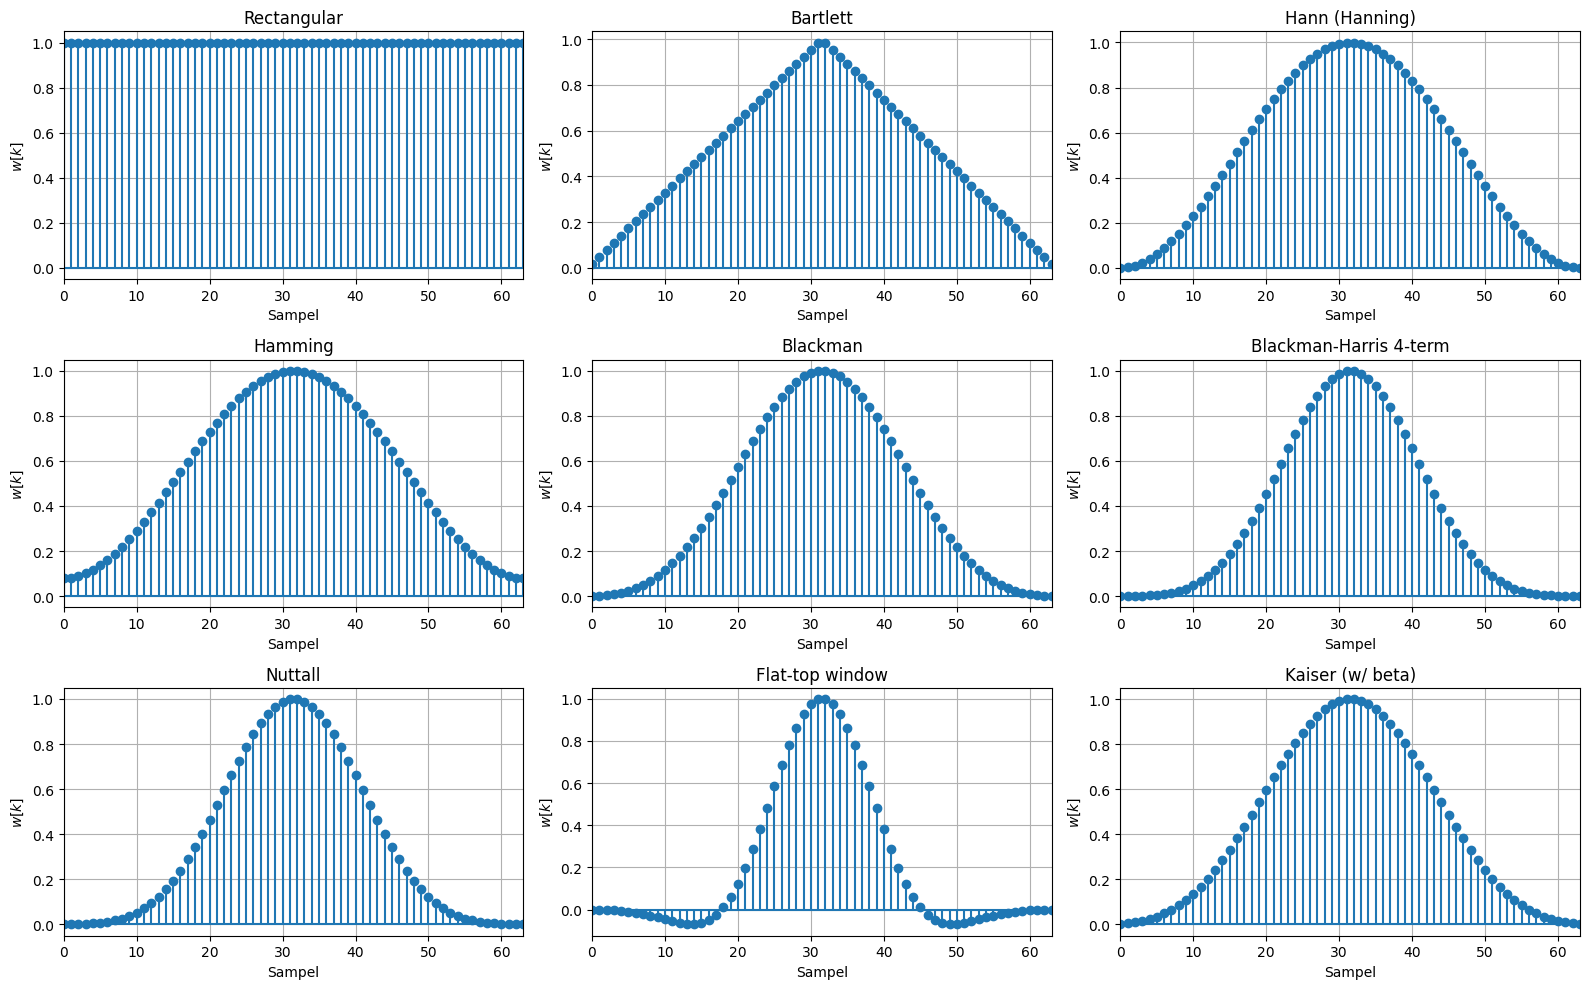

In [9]:
# Solusi error kode berikut dibawah ini :
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # Import modul signal dari scipy

# Panjang jendela
N = 64

# Inisialisasi array untuk menyimpan semua jendela
ww = np.zeros((N, 9))

# Mengisi array dengan berbagai jenis jendela
ww[:,0] = np.ones(N)                          # Jendela rectangular (diratakan)
ww[:,1] = signal.windows.triang(N)            # Jendela Bartlett (triangular)
ww[:,2] = signal.windows.hann(N)              # Jendela Hann (Hanning)
ww[:,3] = signal.windows.hamming(N)           # Jendela Hamming
ww[:,4] = signal.windows.blackman(N)          # Jendela Blackman
ww[:,5] = signal.windows.blackmanharris(N)    # Jendela Blackman-Harris
ww[:,6] = signal.windows.nuttall(N)           # Jendela Nuttall
ww[:,7] = signal.windows.flattop(N)           # Jendela flat-top
ww[:,8] = signal.windows.kaiser(N, beta=8)    # Jendela Kaiser dengan beta=8

# Daftar judul untuk setiap jendela
lst_titles = ['Rectangular', 'Bartlett', 'Hann (Hanning)', 
              'Hamming', 'Blackman', 'Blackman-Harris 4-term', 
              'Nuttall', 'Flat-top window', 'Kaiser (w/ beta)'
             ]

# Plot fungsi jendela dan spektrumnya
fig = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.stem(ww[:,i], use_line_collection=True, basefmt='C0')
    plt.title(lst_titles[i])
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
plt.tight_layout()


Spektrum fungsi jendela utama

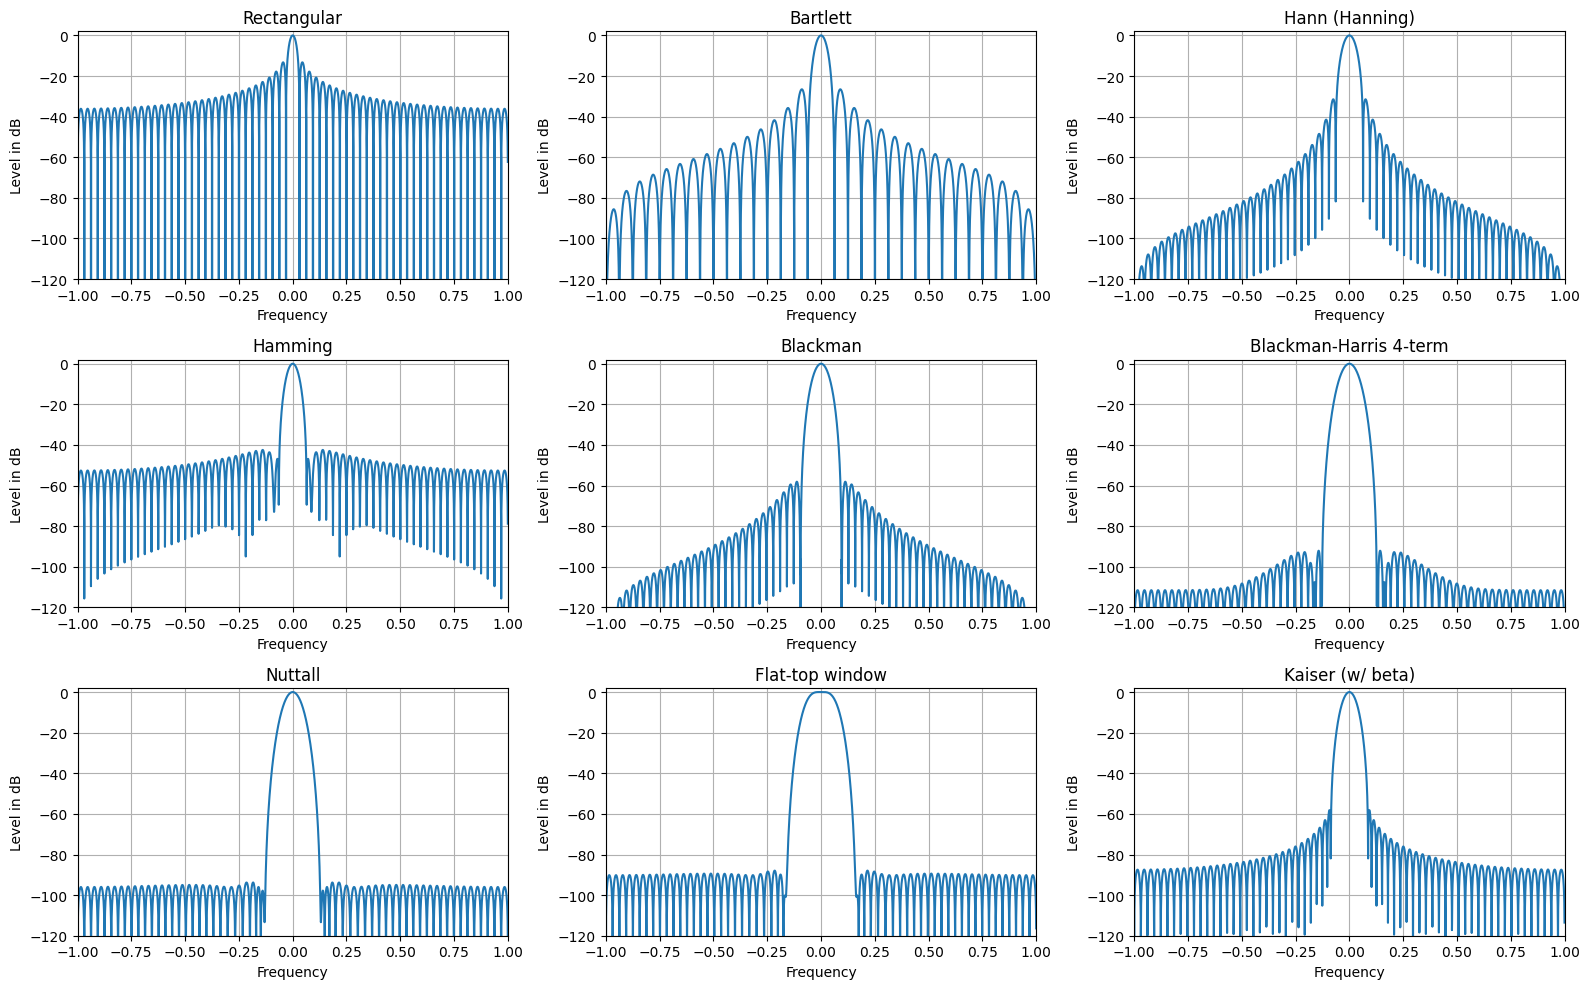

In [21]:
NFFT = 2**12
# Calculate FFT
WW = fft(ww, NFFT, axis=0)
WW = WW / np.amax(WW, axis=0) + np.nextafter(0,1)

tt = np.linspace(-1, 1, NFFT)

# Plot window function and its spectrum
fig2 = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(tt, 20*np.log10(np.abs(fftshift(WW[:,i]))))
    plt.title(lst_titles[i])
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
plt.tight_layout()

Sebelumnya dikatakan bahwa pemfilteran jendela dapat digunakan untuk memisahkan sinyal yang lemah dari latar belakang sinyal yang lebih kuat. Mari buktikan dengan memplotkan jumlah dua sinyal harmonik yang berdekatan satu sama lain dalam frekuensi dan amplitudo yang sangat berbeda.
Grafik berikut menunjukkan spektrum tanpa pemfilteran jendela (jendela berbentuk persegi panjang) dan dengan pemfilteran sinyal input oleh jendela Kaiser dengan parameter yang diberikan beta = 7

In [22]:
# Input parameters
N = 128
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = 100*np.cos(2*np.pi*32*tt)+np.cos(2*np.pi*40*tt)

# Window (Kaiser)
wn = sig.kaiser(N, beta=7)
yy = xx*wn

# Calculate FFT 1
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

# Calculate FFT 2
yft = np.abs(fft(yy, NFFT))
ylg = 20*np.log10(yft / np.max(yft))

lst_ffts = [slg, ylg]
lst_wins = ['No window', 'Kaiser window']
plt.figure(figsize=(16, 5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(lst_wins[i])
    plt.xlabel('freq samples')
    plt.ylabel('level [dB]')
    plt.plot(lst_ffts[i])
    plt.xlim([0, NFFT//2])
    plt.ylim([-80, 0])
    plt.grid(True)
plt.tight_layout()

<class 'NameError'>: name 'sig' is not defined

In [23]:
# Solusi Error kode di atas: 
# Window (Kaiser)
from scipy import signal  # Import modul signal dari scipy
wn = signal.windows.kaiser(N, beta=7)
yy = xx * wn

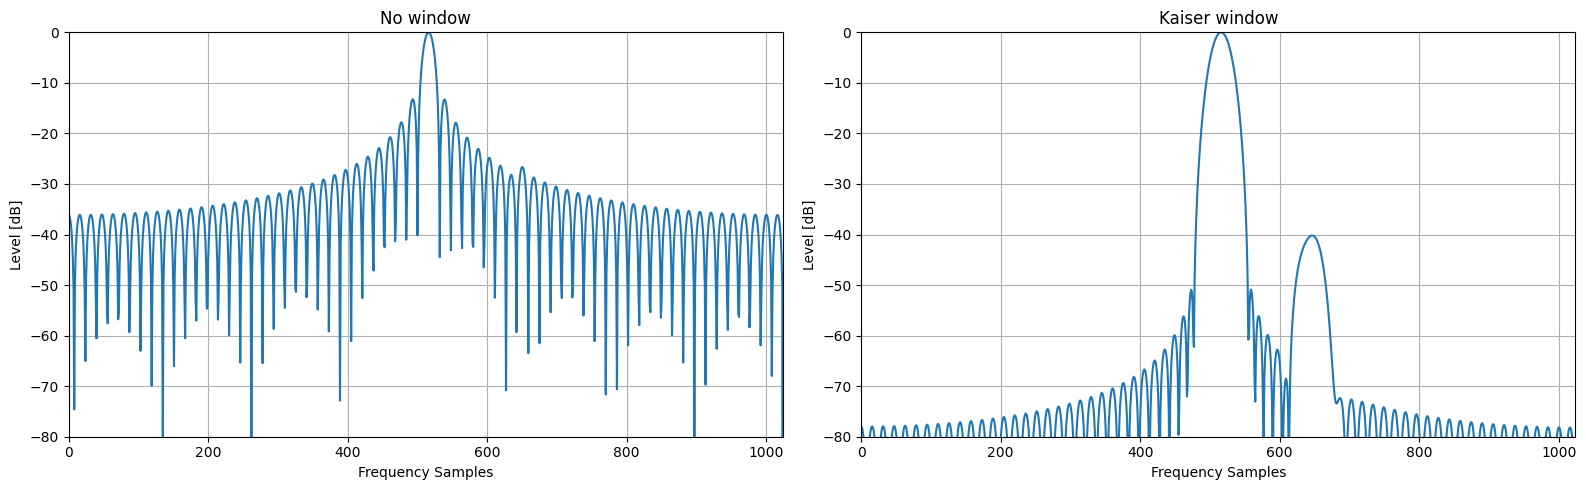

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Input parameters
N = 128
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = 100*np.cos(2*np.pi*32*tt) + np.cos(2*np.pi*40*tt)

# Window (Kaiser)
from scipy import signal  # Import modul signal dari scipy
wn = signal.windows.kaiser(N, beta=7)
yy = xx * wn

# Calculate FFT 1
sft = np.abs(fft(xx, NFFT))
slg = 20 * np.log10(sft / np.max(sft))

# Calculate FFT 2
yft = np.abs(fft(yy, NFFT))
ylg = 20 * np.log10(yft / np.max(yft))

lst_ffts = [slg, ylg]
lst_wins = ['No window', 'Kaiser window']
plt.figure(figsize=(16, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(lst_wins[i])
    plt.xlabel('Frequency Samples')
    plt.ylabel('Level [dB]')
    plt.plot(lst_ffts[i])
    plt.xlim([0, NFFT//2])
    plt.ylim([-80, 0])
    plt.grid(True)
plt.tight_layout()

Seperti yang dapat dilihat pada gambar sebelumnya, tanpa fungsi window, hampir tidak mungkin untuk membedakan sinyal yang lemah terhadap sinyal yang kuat. Namun demikian, dengan menerapkan fungsi window dengan sifat penekanan yang baik, maka dimungkinkan untuk mendeteksi sinyal lemah di latar belakang sinyal yang kuat. 